In [1]:
import numpy as np
import pandas as pd

In [12]:
df=pd.read_csv(r"D:\PycharmProjects\pythonProject\ML_LAB\LAB_1\Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
df.describe(include='object')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [7]:
df.isnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [13]:
df['furnishingstatus'].head()

0         furnished
1         furnished
2    semi-furnished
3         furnished
4         furnished
Name: furnishingstatus, dtype: object

In [14]:
nonnumerical = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for feature in nonnumerical:
    df[feature] = df[feature].apply(lambda x: 1 if x == 'yes' else 0)

df['furnishingstatus'] = df['furnishingstatus'].apply(lambda x: 1 if x == 'furnished'  else (0 if x == 'semi-furnished' else -1))

In [15]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [17]:
area_mean=df['area'].mean()
price_mean=df['price'].mean()
area_std=df['area'].std()
price_std=df['price'].std()

In [19]:
df['bias']=np.ones(df.shape[0])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,bias
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,1.0


In [76]:
X= df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus','bias']].values

y_actual =df['price'].values
X[0:5]

array([[7.42e+03, 4.00e+00, 2.00e+00, 3.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00],
       [8.96e+03, 4.00e+00, 4.00e+00, 4.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 1.00e+00, 3.00e+00, 0.00e+00, 1.00e+00,
        1.00e+00],
       [9.96e+03, 3.00e+00, 2.00e+00, 2.00e+00, 1.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 2.00e+00, 1.00e+00, 0.00e+00,
        1.00e+00],
       [7.50e+03, 4.00e+00, 2.00e+00, 2.00e+00, 1.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 1.00e+00, 3.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00],
       [7.42e+03, 4.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 0.00e+00, 1.00e+00, 2.00e+00, 0.00e+00, 1.00e+00,
        1.00e+00]])

In [77]:
y_actual=(y_actual-price_mean)/price_std
y_actual[0:20]

array([4.56217388, 4.00080852, 4.00080852, 3.98209634, 3.55171624,
       3.25232138, 2.87807781, 2.87807781, 2.72838038, 2.69095602,
       2.69095602, 2.62733462, 2.42898553, 2.39156117, 2.39156117,
       2.31671245, 2.31671245, 2.24186374, 2.20443938, 2.1857272 ])

In [25]:
c=np.min(y_actual)
c

np.float64(-1.6128450351743377)

In [26]:
c=np.max(y_actual)
c

np.float64(4.562173876591275)

In [78]:
X = X.astype(float)
X[0:5]

array([[7.42e+03, 4.00e+00, 2.00e+00, 3.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00],
       [8.96e+03, 4.00e+00, 4.00e+00, 4.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 1.00e+00, 3.00e+00, 0.00e+00, 1.00e+00,
        1.00e+00],
       [9.96e+03, 3.00e+00, 2.00e+00, 2.00e+00, 1.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 2.00e+00, 1.00e+00, 0.00e+00,
        1.00e+00],
       [7.50e+03, 4.00e+00, 2.00e+00, 2.00e+00, 1.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 1.00e+00, 3.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00],
       [7.42e+03, 4.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 0.00e+00, 1.00e+00, 2.00e+00, 0.00e+00, 1.00e+00,
        1.00e+00]])

In [28]:
c=X[:,0].mean()
d=X[:,0].std()
print(c)
print(area_mean)

5150.54128440367
5150.54128440367


In [29]:
print(d)
print(area_std)

2168.149153321305
2170.141022508803


In [79]:
X[:,0]=(X[:,0]-X[:,0].mean())/X[:,0].std()

In [31]:
X[0:5]

array([[1.04672629, 4.        , 2.        , 3.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 2.        ,
        1.        , 1.        , 1.        ],
       [1.75700953, 4.        , 4.        , 4.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 3.        ,
        0.        , 1.        , 1.        ],
       [2.21823241, 3.        , 2.        , 2.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 2.        ,
        1.        , 0.        , 1.        ],
       [1.08362412, 4.        , 2.        , 2.        , 1.        ,
        0.        , 1.        , 0.        , 1.        , 3.        ,
        1.        , 1.        , 1.        ],
       [1.04672629, 4.        , 1.        , 2.        , 1.        ,
        1.        , 1.        , 0.        , 1.        , 2.        ,
        0.        , 1.        , 1.        ]])

In [80]:
weights=np.random.rand(X.shape[1]).reshape(X.shape[1],1)
weights

array([[0.624955  ],
       [0.54189465],
       [0.81996736],
       [0.19332993],
       [0.07596899],
       [0.05666862],
       [0.33314589],
       [0.22047757],
       [0.75556575],
       [0.10908069],
       [0.40074997],
       [0.9934538 ],
       [0.33201731]])

In [81]:
def y_predicted(X,weights):
    return X@weights
Y_predict=y_predicted(X,weights)
Y_predict[0:8]

array([[7.81757712],
       [9.80306755],
       [6.3986175 ],
       [8.08953326],
       [6.79334439],
       [7.07174154],
       [8.17178313],
       [8.15550285]])

In [36]:
y_actual[0:8]

array([4.56217388, 4.00080852, 4.00080852, 3.98209634, 3.55171624,
       3.25232138, 2.87807781, 2.87807781])

In [82]:
def mse_loss(y_actual,weights):
    Y_predict=y_predicted(X,weights)
    return np.mean((y_actual-Y_predict)**2)
mse_loss(y_actual,weights)

np.float64(19.002429180437733)

In [50]:
Y_predict.shape

(545, 1)

In [83]:
#y_actual.reshape(X.shape[0],1)
y_actual =y_actual.reshape(X.shape[0],1)
y_actual.shape

(545, 1)

In [58]:
ex=y_actual-y_predicted(X,weights)
np.std(ex)

np.float64(1.2474902934708203)

In [84]:
lis=[1,3,5,7]
print(X[lis])
a=y_predicted(X[lis],weights).reshape(1,4)
a


[[ 1.75700953  4.          4.          4.          1.          0.
   0.          0.          1.          3.          0.          1.
   1.        ]
 [ 1.08362412  4.          2.          2.          1.          0.
   1.          0.          1.          3.          1.          1.
   1.        ]
 [ 1.08362412  3.          3.          1.          1.          0.
   1.          0.          1.          2.          1.          0.
   1.        ]
 [ 5.09626319  5.          3.          2.          1.          0.
   0.          0.          0.          0.          0.         -1.
   1.        ]]


array([[9.80306755, 8.08953326, 7.07174154, 8.15550285]])

In [85]:
def grad_weights(lis,weights):
    gradients=np.sum((((y_actual[lis]-y_predicted(X[lis],weights)).reshape(1,len(lis))*-1/len(lis)*2)@X[lis]),axis=0)
    return gradients.reshape(-1,1)
grad_weights(lis,weights).shape

(13, 1)

In [86]:
def min_batch_grad_descent(X,batch_size,y_actual,weights,learning_rate=0.01):
    indexes=np.arange(len(y_actual))
    np.random.shuffle(indexes)
    batches=indexes.reshape(-1,batch_size)
    for batch in batches:
        weights-=learning_rate*grad_weights(batch,weights)
        

In [71]:
for i in range(1000):
    print(f"epoch {i} loss: {mse_loss(y_actual,weights)}, weights:{weights}")
    min_batch_grad_descent(X,5,y_actual,weights,learning_rate=0.000001)

epoch 0 loss: 20.04130770810124, weights:[[ 0.62053269]
 [ 0.55790186]
 [ 0.73888279]
 [ 0.33483429]
 [ 0.30403812]
 [ 0.49769571]
 [ 0.81079462]
 [ 0.61445271]
 [-0.01476541]
 [ 0.01755073]
 [ 0.48094845]
 [ 0.31147204]
 [ 0.40430043]]
epoch 1 loss: 19.899117785841554, weights:[[ 0.6204433 ]
 [ 0.55499918]
 [ 0.73762054]
 [ 0.33307805]
 [ 0.30320954]
 [ 0.49749898]
 [ 0.81041874]
 [ 0.61440563]
 [-0.01506578]
 [ 0.01687127]
 [ 0.48070206]
 [ 0.31149145]
 [ 0.40334856]]
epoch 2 loss: 19.75798381981542, weights:[[ 0.62035419]
 [ 0.55210724]
 [ 0.73636296]
 [ 0.33132859]
 [ 0.30238396]
 [ 0.49730294]
 [ 0.81004404]
 [ 0.61435873]
 [-0.01536493]
 [ 0.01619434]
 [ 0.4804565 ]
 [ 0.31151069]
 [ 0.40240015]]
epoch 3 loss: 19.617898890745806, weights:[[ 0.62026531]
 [ 0.54922603]
 [ 0.73510999]
 [ 0.32958587]
 [ 0.30156139]
 [ 0.49710753]
 [ 0.80967057]
 [ 0.61431198]
 [-0.01566288]
 [ 0.01552008]
 [ 0.48021183]
 [ 0.31152991]
 [ 0.40145516]]
epoch 4 loss: 19.47885060549332, weights:[[ 0.6201

In [73]:
Y_predict=y_predicted(X,weights)
Y_predict[0:20]

array([[0.8442151 ],
       [1.42188086],
       [2.27337592],
       [1.49182108],
       [1.23727921],
       [2.03399145],
       [1.16024237],
       [2.79590572],
       [1.82457379],
       [0.48854412],
       [2.96531231],
       [2.03283214],
       [0.536321  ],
       [0.15815035],
       [1.30336876],
       [0.19464546],
       [1.35633567],
       [0.85336558],
       [0.4235114 ],
       [0.71760572]])

In [74]:
y_actual[0:20]

array([[4.56217388],
       [4.00080852],
       [4.00080852],
       [3.98209634],
       [3.55171624],
       [3.25232138],
       [2.87807781],
       [2.87807781],
       [2.72838038],
       [2.69095602],
       [2.69095602],
       [2.62733462],
       [2.42898553],
       [2.39156117],
       [2.39156117],
       [2.31671245],
       [2.31671245],
       [2.24186374],
       [2.20443938],
       [2.1857272 ]])

In [75]:
weights

array([[ 0.57700784],
       [-0.21588152],
       [ 0.40265053],
       [-0.08782388],
       [ 0.07324611],
       [ 0.43240201],
       [ 0.68181546],
       [ 0.60048361],
       [-0.07518101],
       [-0.1433237 ],
       [ 0.40632671],
       [ 0.30750927],
       [ 0.13668881]])

epoch 0 loss: 16.41716467821876, weights:[[0.624955  ]
 [0.54189465]
 [0.81996736]
 [0.19332993]
 [0.07596899]
 [0.05666862]
 [0.33314589]
 [0.22047757]
 [0.75556575]
 [0.10908069]
 [0.40074997]
 [0.9934538 ]
 [0.33201731]]
epoch 1 loss: 16.30285883467179, weights:[[0.62483689]
 [0.53930129]
 [0.81883177]
 [0.19175351]
 [0.07523112]
 [0.05650362]
 [0.33282803]
 [0.22044013]
 [0.75526019]
 [0.1084402 ]
 [0.40053061]
 [0.99338043]
 [0.33117219]]
epoch 2 loss: 16.189403029059857, weights:[[0.62471893]
 [0.53671755]
 [0.81770044]
 [0.19018317]
 [0.07449598]
 [0.05633917]
 [0.33251126]
 [0.22040282]
 [0.75495576]
 [0.10780211]
 [0.40031207]
 [0.99330694]
 [0.33033019]]
epoch 3 loss: 16.076787864152728, weights:[[0.62460119]
 [0.5341434 ]
 [0.81657323]
 [0.18861881]
 [0.07376351]
 [0.05617536]
 [0.33219566]
 [0.22036567]
 [0.75465236]
 [0.10716631]
 [0.4000943 ]
 [0.99323336]
 [0.32949125]]
epoch 4 loss: 15.965007062408176, weights:[[0.62448365]
 [0.53157874]
 [0.81545017]
 [0.18706044]
 [0.

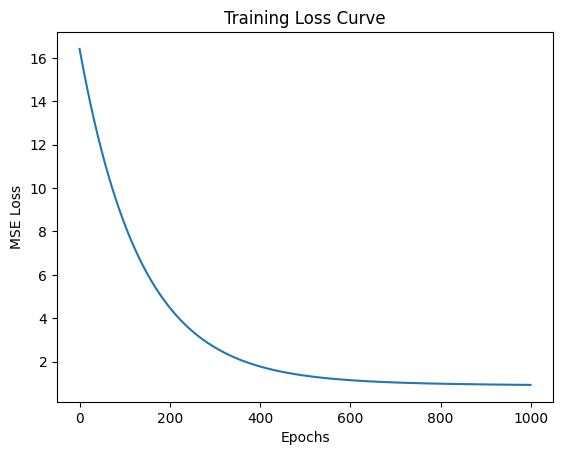

In [87]:
import matplotlib.pyplot as plt

losses = []

for i in range(1000):
    loss = mse_loss(y_actual, weights)   # compute loss
    losses.append(loss)                  # store it for plotting
    print(f"epoch {i} loss: {loss}, weights:{weights}")
    min_batch_grad_descent(X, 5, y_actual, weights, learning_rate=0.000001)

# plot loss curve
plt.plot(range(1000), losses)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve")
plt.show()


In [90]:
Y_predict=y_predicted(X,weights)
Y_predict[0:40]

array([[ 2.22284286],
       [ 3.05920296],
       [ 1.86846702],
       [ 2.60483802],
       [ 1.80607054],
       [ 2.60890112],
       [ 1.94044506],
       [ 2.33492232],
       [ 2.31570125],
       [ 0.01424448],
       [ 3.75396529],
       [ 1.11276463],
       [ 1.34528231],
       [ 0.61915712],
       [ 1.2052875 ],
       [-0.13853705],
       [ 0.69840183],
       [ 2.11994538],
       [ 1.50863109],
       [ 1.45688979],
       [-0.21028319],
       [ 0.77441221],
       [ 2.36210741],
       [ 1.79717335],
       [ 2.57212491],
       [ 2.43164305],
       [ 1.28240965],
       [ 0.75481619],
       [ 0.0365193 ],
       [ 1.31328582],
       [ 0.04700307],
       [ 0.31665177],
       [ 1.82412951],
       [ 0.19165637],
       [ 1.57554559],
       [ 1.73669868],
       [ 1.99198464],
       [ 2.10287209],
       [-0.83477762],
       [ 0.49333612]])

In [91]:
y_actual[0:40]

array([[4.56217388],
       [4.00080852],
       [4.00080852],
       [3.98209634],
       [3.55171624],
       [3.25232138],
       [2.87807781],
       [2.87807781],
       [2.72838038],
       [2.69095602],
       [2.69095602],
       [2.62733462],
       [2.42898553],
       [2.39156117],
       [2.39156117],
       [2.31671245],
       [2.31671245],
       [2.24186374],
       [2.20443938],
       [2.1857272 ],
       [2.12959067],
       [2.09216631],
       [2.07345413],
       [2.07345413],
       [2.03602978],
       [2.0173176 ],
       [1.97615081],
       [1.94246888],
       [1.94246888],
       [1.94246888],
       [1.94246888],
       [1.94246888],
       [1.88633235],
       [1.83019581],
       [1.79277146],
       [1.77188866],
       [1.75160466],
       [1.71792274],
       [1.70856665],
       [1.68049838]])